# UBER & LYFT PRICE ANALYSIS

###### PURPOSE

Taxi prices vary for different reasons. The most important factor is distance which means customers who go far pay more than those who use taxis for shorter distances. Another factor used by companies is time. Rather than the distance extra charge can be calculated considering the time spent, as it varies from situation to situation (ex. traffic). But, price variation is not always as simple as the example above. Nowadays, demand plays an important role on defining prices for companies. But there are different factors affecting demand too. The common factors can be holidays and the temperature.
For companies which operates online like Uber and Lyft, this variation can be even huge. Let's see how prices differ for these companies. 







In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import t
from numpy.random import seed
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
#importing the dataset
path = 'cab_rides.csv'
df = pd.read_csv(path)

In [3]:
#first five rows of the dataframe (df)
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
#turning time_stamp column into human interpretable format
df['date_time'] = pd.to_datetime(df['time_stamp']/1000, unit = 's')

In [5]:
#sorting data by data_time
df = df.sort_values(by = 'date_time')

In [6]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
30792,3.03,Lyft,1543203646318,Theatre District,Boston University,34.0,1.0,ef4771c2-c88d-4730-aaf7-a95751e9d27e,lyft_luxsuv,Lux Black XL,2018-11-26 03:40:46.318000078
446073,1.57,Uber,1543203646319,North End,Theatre District,NaN,1.0,9962f244-8fce-4ae9-a583-139d5d7522e1,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-26 03:40:46.319000006
65662,1.30,Uber,1543203646319,Theatre District,South Station,18.5,1.0,00ea74ea-2c49-416c-bfc5-f7877025f6eb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-26 03:40:46.319000006
613927,2.71,Uber,1543203646320,Fenway,Theatre District,19.5,1.0,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-11-26 03:40:46.319999933
98705,2.43,Lyft,1543203646320,Beacon Hill,Northeastern University,10.5,1.0,edfc7f44-97e1-48cd-930c-e4fe20e88ac8,lyft,Lyft,2018-11-26 03:40:46.319999933


In [7]:
#creating 'mile' column which is a price per mile
df['mile'] = df['price']/df['distance']

In [8]:
#getting info to determine null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 30792 to 205382
Data columns (total 12 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
date_time           693071 non-null datetime64[ns]
mile                637976 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 68.7+ MB


In [9]:
#separating date and time column
df['date'] = [d.date() for d in df['date_time']]
df['time'] = [d.time() for d in df['date_time']]

In [10]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,mile,date,time
30792,3.03,Lyft,1543203646318,Theatre District,Boston University,34.0,1.0,ef4771c2-c88d-4730-aaf7-a95751e9d27e,lyft_luxsuv,Lux Black XL,2018-11-26 03:40:46.318000078,11.221122,2018-11-26,03:40:46.318000
446073,1.57,Uber,1543203646319,North End,Theatre District,NaN,1.0,9962f244-8fce-4ae9-a583-139d5d7522e1,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-26 03:40:46.319000006,NaN,2018-11-26,03:40:46.319000
65662,1.30,Uber,1543203646319,Theatre District,South Station,18.5,1.0,00ea74ea-2c49-416c-bfc5-f7877025f6eb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-26 03:40:46.319000006,14.230769,2018-11-26,03:40:46.319000
613927,2.71,Uber,1543203646320,Fenway,Theatre District,19.5,1.0,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-11-26 03:40:46.319999933,7.195572,2018-11-26,03:40:46.319999
98705,2.43,Lyft,1543203646320,Beacon Hill,Northeastern University,10.5,1.0,edfc7f44-97e1-48cd-930c-e4fe20e88ac8,lyft,Lyft,2018-11-26 03:40:46.319999933,4.320988,2018-11-26,03:40:46.319999


In [11]:
#reseting index
df = df.reset_index(drop = True)

In [12]:
#switching columns to make date and time columns first two
df1 = df[['date', 'time', 'date_time', 'id']]
df2 = df[['distance', 'cab_type', 'destination', 'source', 'price', 'surge_multiplier', 'name', 'mile', 'id']]
df = pd.merge(df1, df2, on = 'id' )

df = df.drop(columns = 'id')
df.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.57,Uber,North End,Theatre District,NaN,1.0,Taxi,NaN
2,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
3,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
4,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988


In [13]:
#getting the shape of df
df.shape

(693071, 11)

In [14]:
#dropping nulls
df = df.dropna()

In [15]:
df.shape

(637976, 11)

In [16]:
#descriptive statistics
df.describe()

,distance,price,surge_multiplier,mile
count,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,16.545125,1.015068,9.687674
std,1.135413,9.324359,0.095422,13.705589
min,0.020000,2.500000,1.000000,0.556586
25%,1.270000,9.000000,1.000000,4.661017
50%,2.160000,13.500000,1.000000,7.492326
75%,2.930000,22.500000,1.000000,11.538462
max,7.860000,97.500000,3.000000,1375.000000


Below distribution of price is given. We can observe that there is big variation of price and it skews to the right. Although this is good observation it does not tell us the whole story as price is highly affected by the distance.

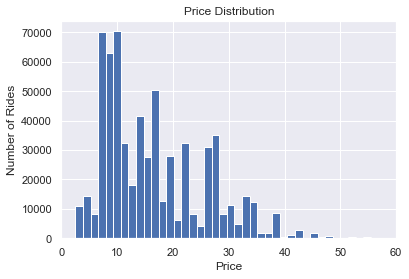

In [17]:
#plotting histogram of 'price'
sns.set()

_ = plt.hist(df.price, bins = 70)
_ = plt.xlabel('Price')
_ = plt.ylabel('Number of Rides')
_ = plt.title('Price Distribution')
_ = plt.xlim((0, 60))

plt.show()

For that reason we check the distribution of price per mile and it gives us less variation. However, we can see that it also has skewness to the right. This is because there are some short distance rides high price.

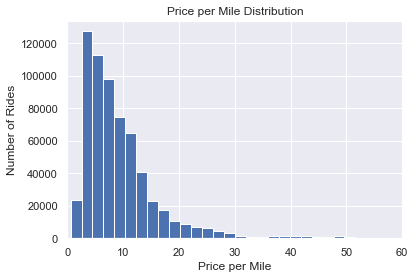

In [18]:
#plotting histogram of 'mile'
_ = plt.hist(df.mile, bins = 700)
_ = plt.xlabel('Price per Mile')
_ = plt.ylabel('Number of Rides')
_ = plt.title('Price per Mile Distribution')
_ = plt.xlim((0, 60))

plt.show()

/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


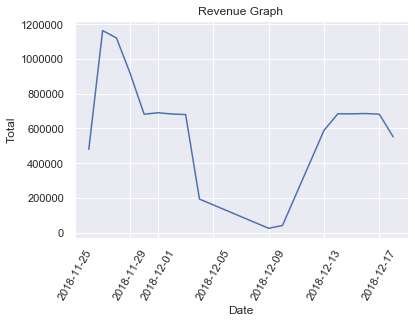

In [19]:
#plotting revenue graph during whole period
_ = plt.plot(df[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')
_ = plt.xticks(rotation = 60)

plt.show()

The graph above displays the revenue over the time. We can observe from the graph that in the beginning of the period we have the highest revenue. We can assume that happens because of Thanksgiving and Black Friday. However, we notice that there is drammatic decrease in the middle, following with increase by the end of the period.
The graph below presents average price per mile during this period. We can observe unsimilar trend compared to prior line graph, where this time we observe highest average price per mile in the middle of the graph.

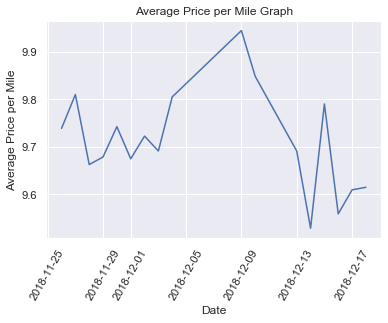

In [20]:
#plotting average price per mile during whole time
_ = plt.plot(df[['date', 'mile']].groupby('date').mean())
_ = plt.xlabel('Date')
_ = plt.ylabel('Average Price per Mile')
_ = plt.title('Average Price per Mile Graph')
_ = plt.xticks(rotation = 60)

plt.show()

In [21]:
#dropping duplicates
df = df.drop_duplicates()

In [22]:
df.shape

(637905, 11)

In [23]:
df.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
2,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
3,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
4,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988
5,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118


In [24]:
df = df.reset_index(drop = True)

In [25]:
df.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
3,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988
4,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118


### UBER

In [26]:
#splitting dataframe into uber and lyft
uber = df[df['cab_type']=='Uber']

In [27]:
uber.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
1,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
4,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118
5,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968
6,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623


In [28]:
#counting rides for each taxi category 
uber.name.value_counts()

Black SUV    55088
UberX        55088
WAV          55086
UberXL       55086
UberPool     55085
Black        55085
Name: name, dtype: int64

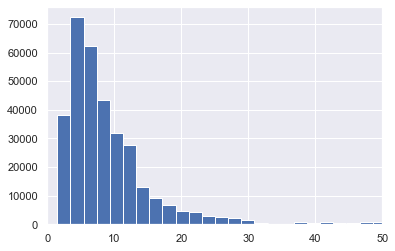

In [29]:
#price per mile distribution for uber
_ = plt.hist(uber['mile'], bins = 700)
_ = plt.xlim((0, 50))

In [30]:
uber = uber.reset_index(drop = True)

In [31]:
#splitting uber dataframe into 6 dataframes according to taxi categories
uberxl = uber[uber['name'] == 'UberXL']
uberbls = uber[uber['name'] == 'Black SUV']
uberbl = uber[uber['name'] == 'Black']
uberw = uber[uber['name'] == 'WAV']
uberx = uber[uber['name'] == 'UberX']
uberpool = uber[uber['name'] == 'UberPool']

Graphs below are distributions of average price per mile for each uber category. Main part of the all distributions are gathered on the left hand side of x axis. This is because, there are outliers which push the graph to the right. We call them outliers as these observations rarely happen. To deal with this, I assumed price per mile over $50 is an outlier and therefore I drop those values.

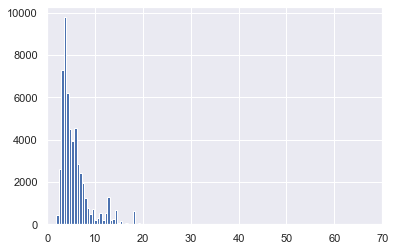

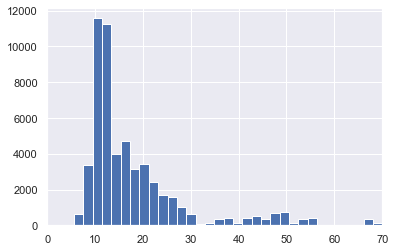

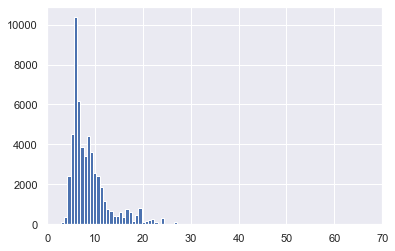

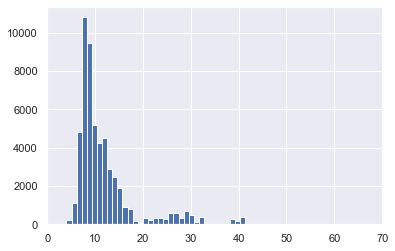

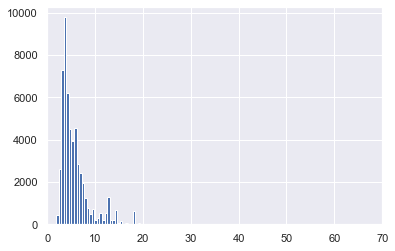

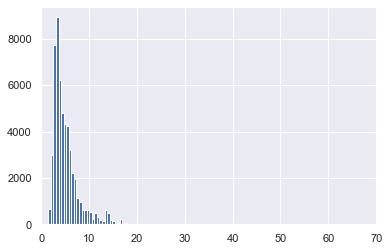

In [32]:
#plotting price per mile distribution for each category
series = [uberw['mile'], uberbls['mile'], uberxl['mile'], uberbl['mile'], uberx['mile'], uberpool['mile']]
titles = ['WAV', 'Black SUV', 'XL', 'Black', 'X', 'Pool']

for i in series:
    graphs = plt.hist(i, bins = 700)
    plt.xlim((0, 70))
    plt.show()


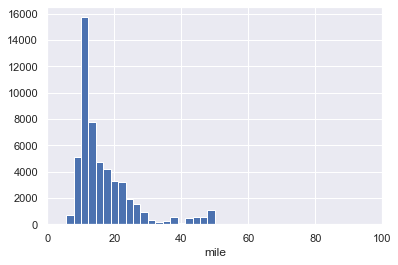

In [157]:
_ = plt.hist(uberbls['mile'], bins = 20)
_ = plt.xlim((0, 100))
_ = plt.xlabel('mile')
plt.show()

In [34]:
#dropping values where price per mile is over $50
uber = uber.drop(uber[uber['mile']>50].index)

The graph below describes the distribution of price per mile over each uber category. We can see that, Black SUV cost the most compared to others.

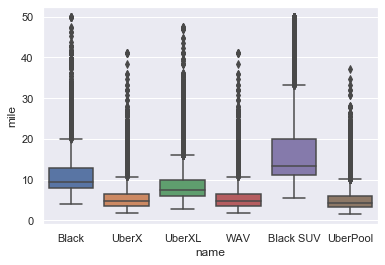

In [35]:
#boxplot of price per mile for each category
_ = sns.boxplot(uber['name'], uber['mile'])

In [36]:
#reassigning each category to different dataframes
uberxl = uber[uber['name'] == 'UberXL']
uberbls = uber[uber['name'] == 'Black SUV']
uberbl = uber[uber['name'] == 'Black']
uberw = uber[uber['name'] == 'WAV']
uberx = uber[uber['name'] == 'UberX']
uberpool = uber[uber['name'] == 'UberPool']

Scatter plot is used here to visualize the relationship between distance and price. As expected, more distance cost more for customers. At the same time, we can see price difference for different uber categories.

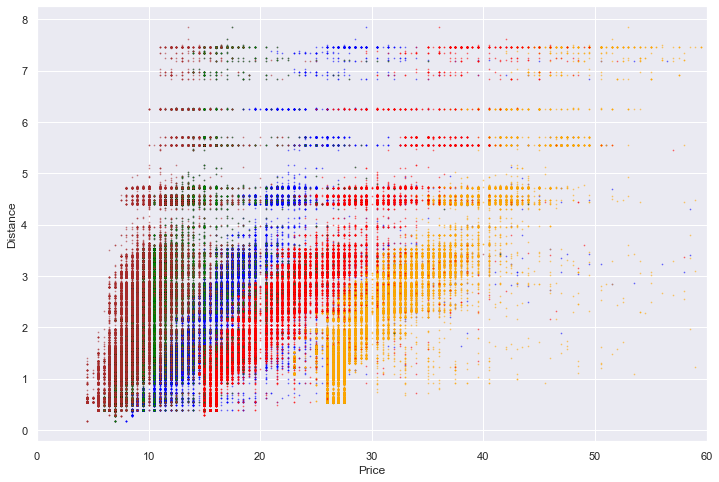

In [154]:
#scatter plot between distance and price for each category
_ = plt.figure(figsize = (12, 8))
_ = plt.scatter(uberxl['price'], uberxl['distance'],  color = "blue", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberbls['price'], uberbls['distance'], color = "orange", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberbl['price'], uberbl['distance'], color = "red", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberw['price'], uberw['distance'],  color = "purple", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberx['price'], uberx['distance'], color = "green", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberpool['price'], uberpool['distance'], color = "brown", s = 0.5, alpha = 0.5)
_ = plt.xlabel('Price')
_ = plt.ylabel('Distance')
_ = plt.xlim((0, 60))
_ = plt.show()

We can observe very similar trend to mixed dataset on the graph below. This represents revenue over the time.

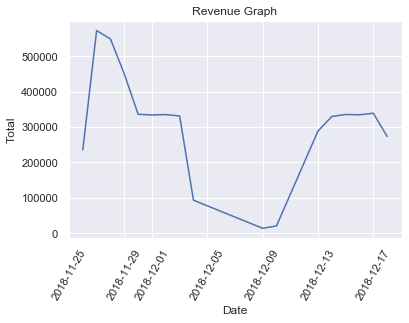

In [39]:
#revenue graph of uber
_ = plt.plot(uber[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')
_ = plt.xticks(rotation = 60)

plt.show()

However, price per mile graph shows different trend for uber. This is most likely because of dropped observations (price per mile over $50)

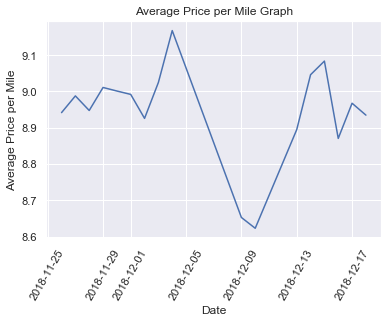

In [40]:
#average price per mile graph of uber
_ = plt.plot(uber[['date', 'mile']].groupby('date').mean())
_ = plt.xlabel('Date')
_ = plt.ylabel('Average Price per Mile')
_ = plt.title('Average Price per Mile Graph')
_ = plt.xticks(rotation = 60)

plt.show()

In [41]:
uber.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623


In [42]:
uber.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623


In [43]:
type(uber['time'][0])

datetime.time

In [44]:
#adding a column which contains the part of the day
def determine_time(time):
    hr = time.hour
    if hr < 5:
        return 'night'
    elif hr >= 5 and hr < 11:
        return 'morning'
    elif hr >= 11 and hr < 17:
        return 'afternoon'
    elif hr >= 17 and hr < 23: 
        return 'evening'
    else: 
        return 'night'
    
time_col_index = 1
uber['day'] = uber.apply(lambda row: determine_time(row[time_col_index]), axis=1)

In [45]:
uber.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769,night
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572,night
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118,night
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968,night
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623,night


In [46]:
#revenue on each part of the day during whole time
uber[['day', 'price']].groupby('day').sum()

,price
day,
afternoon,1358988.5
evening,1278320.0
morning,1203487.0
night,1327195.0


In [47]:
#adding a column which contains if the day was holiday
holidays = [28, 29, 30, 1, 2, 7, 8, 9, 14, 15, 16]

def determine_day(date):
    day = date.day
    if day in holidays:
        return 'Yes'
    else:
        return 'No'



day_col_index = 0
uber['holiday'] = uber.apply(lambda row: determine_day(row[day_col_index]), axis=1)

In [48]:
uber.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769,night,No
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572,night,No
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118,night,No
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968,night,No
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623,night,No


In [49]:
#splitting uber dataframe into two one with only holidays and weekends, the other with working days
uber_holiday = uber[uber['holiday'] == 'Yes']
uber_work = uber[uber['holiday'] == 'No']

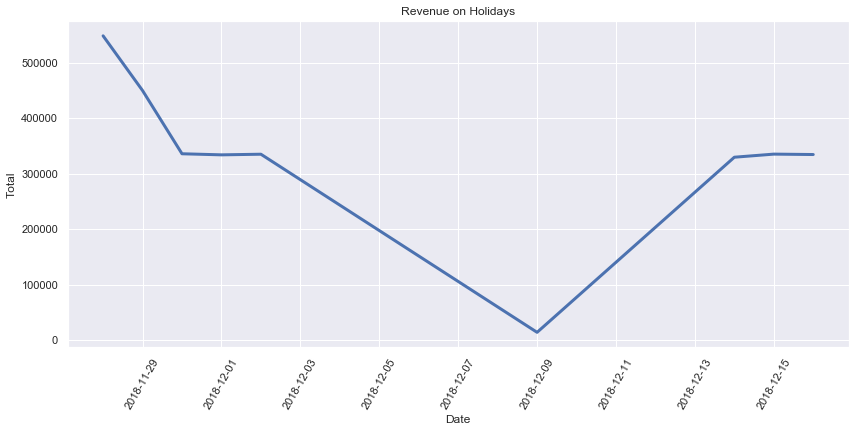

In [50]:
#Revenue lines on holidays and on work days

_ = plt.figure(figsize = (14, 6))

plot1,  = plt.plot(uber_holiday[['date', 'price']].groupby('date').sum(), linewidth = 3)

_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Holidays')

_ = plt.xticks(rotation = 60)

plt.show()

Revenue graph above describes holidays. Although we assumed, high revenue on the first days (whole dataset) happened because of holidays, we can observe very similar trend on just holiday data. First few days very high revenue (let's assume, because of Thanksgiving and Black Friday) followed by drop in the middle and increase at the end. This is weired, because except from the holidays, this graph only contains weekends. So there is something affecting in the middle and at the end of the period.
The graph below (work days) gives us the similar trend, although this is from just weekdays. So no matter if the day is weekend or week day, we observe huge decrease in first ten days of December followed by increase in the second ten days of December. But, what is this affecting the revenue (or demand) on those days? Why do we observe similar trends, on both graphs, although we assumed people use taxi more on holidays and weekends?

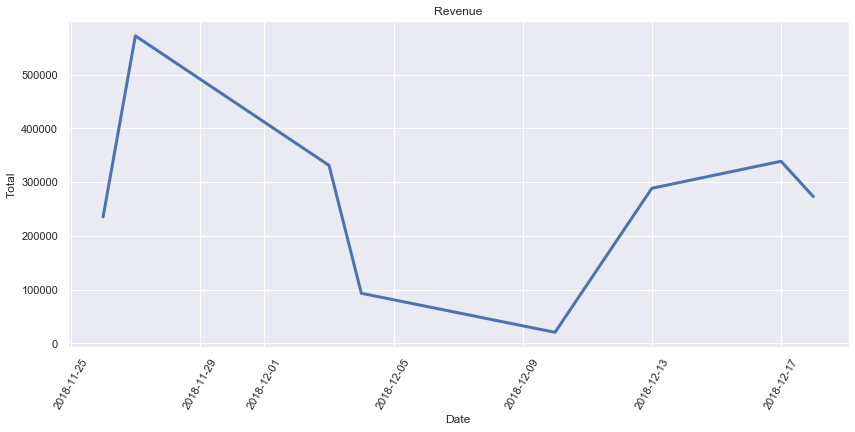

In [51]:
_ = plt.figure(figsize = (14, 6))

plot2, = plt.plot(uber_work[['date', 'price']].groupby('date').sum(), linewidth = 3)

_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue')

_ = plt.xticks(rotation = 60)

plt.show()

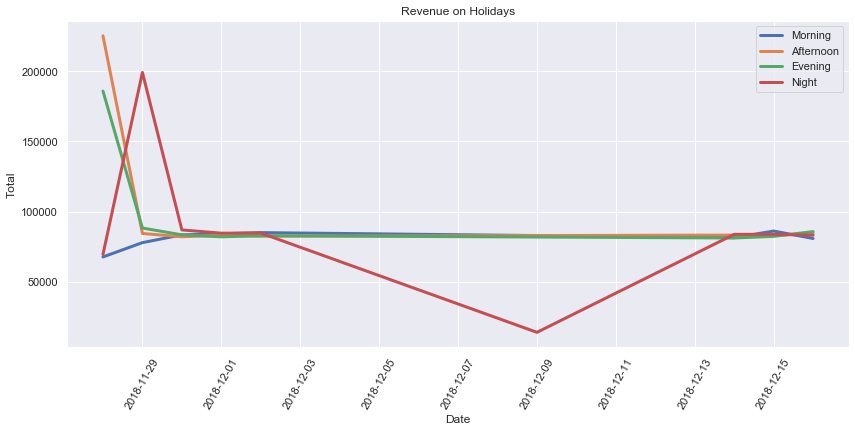

In [52]:
#revenue lines on different part of the days when holiday

_ = plt.figure(figsize = (14, 6))

plot1,  = plt.plot(uber_holiday[uber_holiday['day'] == 'morning'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot2,  = plt.plot(uber_holiday[uber_holiday['day'] == 'afternoon'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot3,  = plt.plot(uber_holiday[uber_holiday['day'] == 'evening'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot4,  = plt.plot(uber_holiday[uber_holiday['day'] == 'night'][['date', 'price']].groupby('date').sum(), linewidth = 3)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Holidays')
_ = plt.legend([plot1, plot2, plot3, plot4], ["Morning", "Afternoon", "Evening", "Night"])
_ = plt.xticks(rotation = 60)

plt.show()

The graph above describes revenue based on the part of the day on holiday. Usually, we have low revenue in the night (except Thanksgiving night). Interestingly, on holidays we observe identical revenue for morning, afternoon, and night. 
The graph below represents the same, but this time just on weekdays. Here we see, low revenue for morning which makes sense, as after 9 o'clock, we assume people are at work.

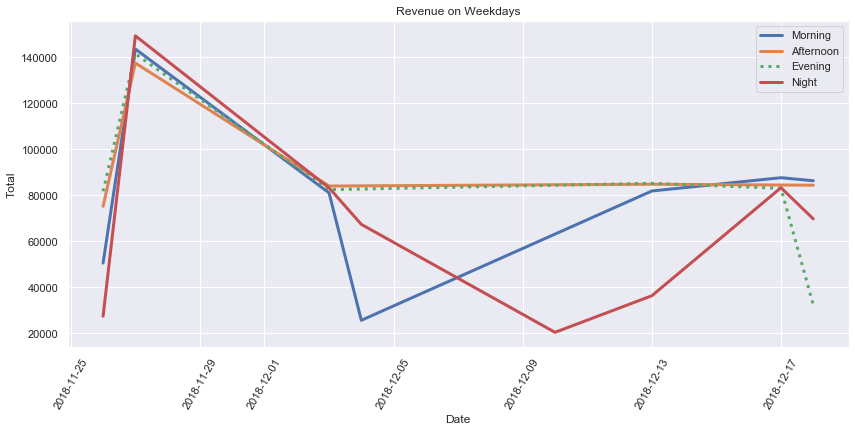

In [53]:
#revenue on different part of the days when work day

_ = plt.figure(figsize = (14, 6))
plot1, = plt.plot(uber_work[uber_work['day'] == 'morning'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot2, = plt.plot(uber_work[uber_work['day'] == 'afternoon'][['date', 'price']].groupby('date').sum(), linewidth = 3, linestyle = '-')
plot3, = plt.plot(uber_work[uber_work['day'] == 'evening'][['date', 'price']].groupby('date').sum(), linewidth = 3, linestyle = ':')
plot4, = plt.plot(uber_work[uber_work['day'] == 'night'][['date', 'price']].groupby('date').sum(),linewidth = 3)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Weekdays')
_ = plt.legend([plot1, plot2, plot3, plot4], ["Morning", "Afternoon", "Evening", "Night"])
_ = plt.xticks(rotation = 60)

plt.show()

### LYFT

In [54]:
#assigning lyft data into new dataframe
lyft = df[df['cab_type'] == 'Lyft']

In [55]:
lyft.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122
3,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988
9,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153
10,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224
11,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453


In [56]:
lyft = lyft.reset_index(drop = True)

In [57]:
#counting number of rides for each taxi category
lyft.name.value_counts()

Shared          51233
Lux             51232
Lux Black XL    51231
Lyft XL         51231
Lux Black       51231
Lyft            51229
Name: name, dtype: int64

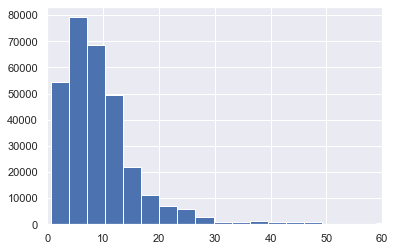

In [58]:
#distribution of price per mile
_ = plt.hist(lyft['mile'], bins = 35)
_ = plt.xlim((0, 60))

In [59]:
lyft = lyft.reset_index(drop = True)

In [60]:
lyft.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988
2,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153
3,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224
4,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453


In [61]:
#assigning different lyft categories into new dataframes

lyftsh = lyft[lyft['name'] == 'Shared']
lyftl = lyft[lyft['name'] == 'Lux']
lyftxl = lyft[lyft['name'] == 'Lyft XL']
lyftbxl = lyft[lyft['name'] == 'Lux Black XL']
lyftb = lyft[lyft['name'] == 'Lux Black']
lyftr = lyft[lyft['name'] == 'Lyft']

Graphs below are distributions of average price per mile for each lyft category. Main part of the all distributions are gathered on the left hand side of x axis. This is because, there are outliers which push the graph to the right. We call them outliers as these observations rarely happen. To deal with this, I assumed price per mile over $50 is an outlier and therefore I drop those values.

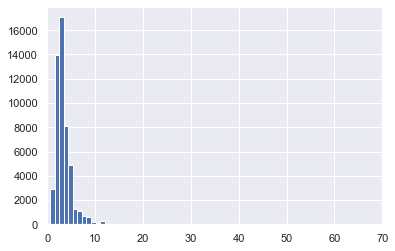

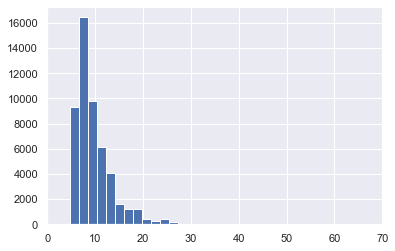

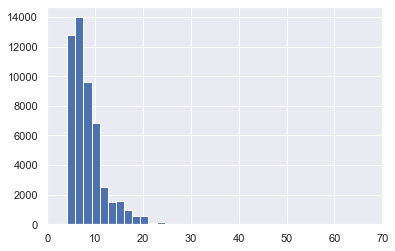

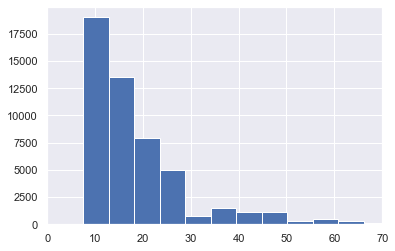

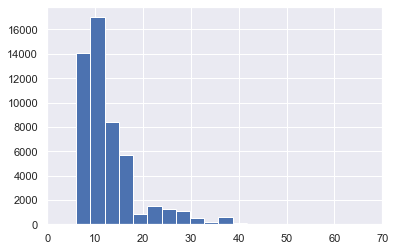

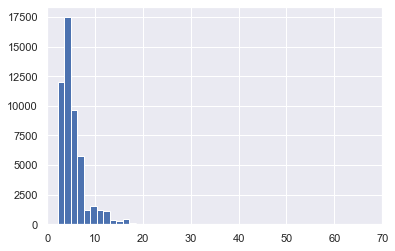

In [62]:
#price per mile distribution for each category

series = [lyftsh['mile'], lyftl['mile'], lyftxl['mile'], lyftbxl['mile'], lyftb['mile'], lyftr['mile']]

for i in series:
    graphs = plt.hist(i, bins = 20)
    plt.xlim((0, 70))
    plt.show()

In [63]:
#dropping rows where price per mile is over $50
lyft = lyft.drop(lyft[lyft['mile']>50].index)

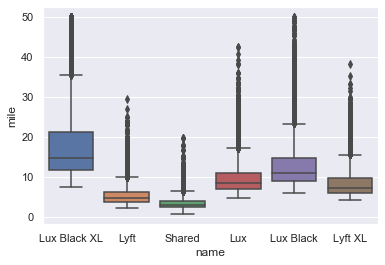

In [64]:
#boxplot of price per mile for each category
_ = sns.boxplot(lyft['name'], lyft['mile'])

In [65]:
lyft.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988
2,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153
3,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224
4,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453


In [66]:
lyft = lyft.reset_index(drop = True)

In [67]:
#reassigning each category into new dataframes

lyftsh = lyft[lyft['name'] == 'Shared']
lyftl = lyft[lyft['name'] == 'Lux']
lyftxl = lyft[lyft['name'] == 'Lyft XL']
lyftbxl = lyft[lyft['name'] == 'Lux Black XL']
lyftb = lyft[lyft['name'] == 'Lux Black']
lyftr = lyft[lyft['name'] == 'Lyft']

Scatter plot is used here to visualize the relationship between distance and price. As expected, more distance cost more for customers. At the same time, we can see price difference for different uber categories.

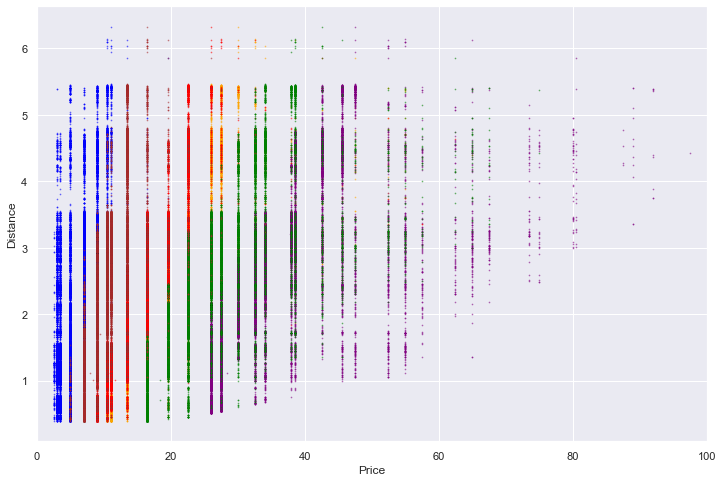

In [68]:
#scatterplot of price and distance for each category

_ = plt.figure(figsize = (12, 8))
_ = plt.scatter(lyftsh['price'], lyftsh['distance'],  color = "blue", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftl['price'], lyftl['distance'], color = "orange", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftxl['price'], lyftxl['distance'], color = "red", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftbxl['price'], lyftbxl['distance'],  color = "purple", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftb['price'], lyftb['distance'], color = "green", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftr['price'], lyftr['distance'], color = "brown", s = 0.5, alpha = 0.5)
_ = plt.xlabel('Price')
_ = plt.ylabel('Distance')
_ = plt.title('')
_ = plt.xlim((0, 100))
_ = plt.show()

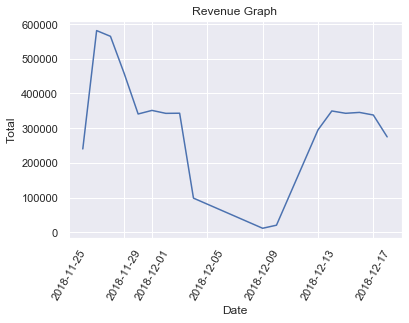

In [69]:
#revenue of lyft during whole time

_ = plt.plot(lyft[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')
_ = plt.xticks(rotation = 60)

plt.show()

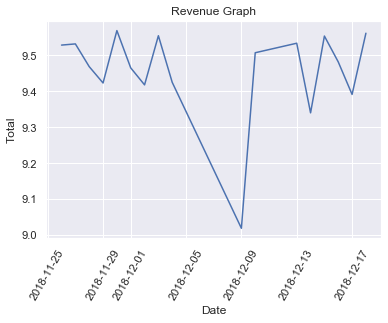

In [70]:
#average price per mile during whole time

_ = plt.plot(lyft[['date', 'mile']].groupby('date').mean())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')
_ = plt.xticks(rotation = 60)

plt.show()

In [71]:
#creating two new columns. 'day' column contains the part of the day, 'holiday' contains if it is holiday (or weekend).

time_col_index = 1
lyft['day'] = lyft.apply(lambda row: determine_time(row[time_col_index]), axis=1)

day_col_index = 0
lyft['holiday'] = lyft.apply(lambda row: determine_day(row[day_col_index]), axis=1)

In [72]:
lyft.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122,night,No
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988,night,No
2,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153,night,No
3,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224,night,No
4,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453,night,No


In [73]:
#splitting lyft dataframe into two one with only holidays and weekends, the other with working days
lyft_holiday = lyft[lyft['holiday'] == 'Yes']
lyft_work = lyft[lyft['holiday'] == 'No']

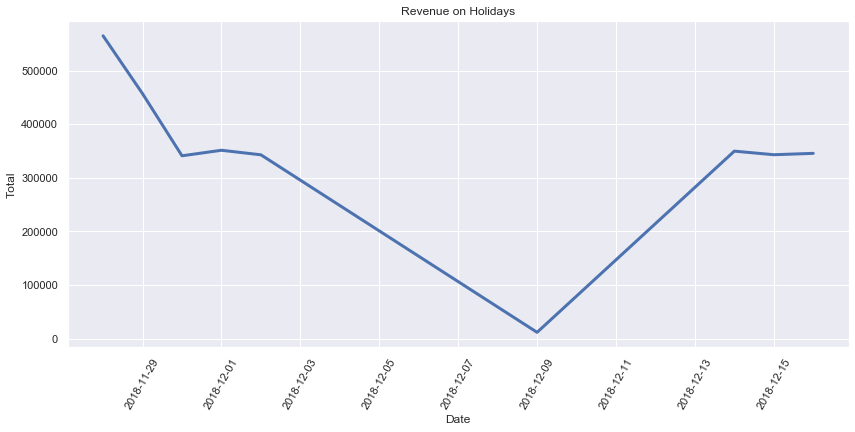

In [74]:
#Revenue lines on holidays and on work days

_ = plt.figure(figsize = (14, 6))

plot1,  = plt.plot(lyft_holiday[['date', 'price']].groupby('date').sum(), linewidth = 3)

_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Holidays')
_ = plt.xticks(rotation = 60)

Revenue graph above describes holidays. Although we assumed, high revenue on the first days (whole dataset) happened because of holidays, we can observe very similar trend on just holiday data. First few days very high revenue (let's assume, because of Thanksgiving and Black Friday) followed by drop in the middle and increase at the end. This is weired, because except from the holidays, this graph only contains weekends. So there is something affecting in the middle and at the end of the period. The graph below (work days) gives us the similar trend, although this is from just weekdays. So no matter if the day is weekend or week day, we observe huge decrease in first ten days of December followed by increase in the second ten days of December. But, what is this affecting the revenue (or demand) on those days? Why do we observe similar trends, on both graphs, although we assumed people use taxi more on holidays and weekends?

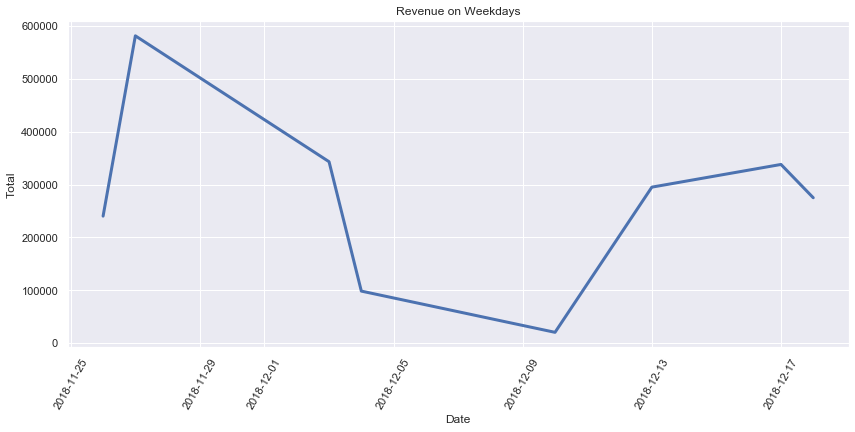

In [75]:
plt.figure(figsize = (14,6))

plot2, = plt.plot(lyft_work[['date', 'price']].groupby('date').sum(), linewidth = 3)

_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Weekdays')
_ = plt.xticks(rotation = 60)

plt.show()

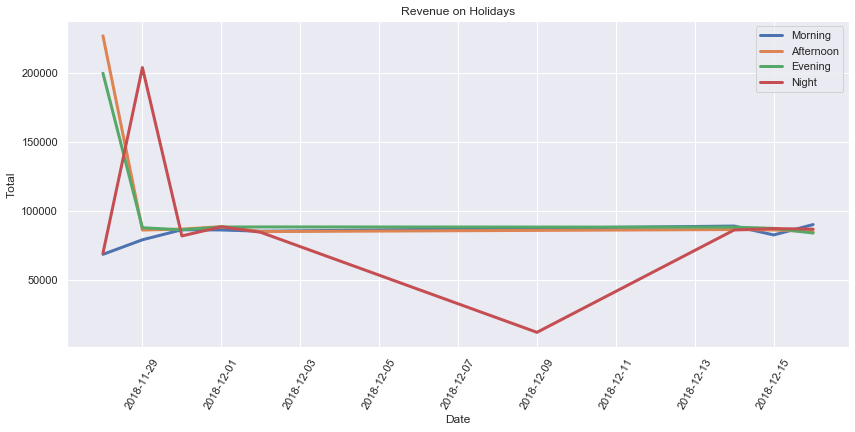

In [76]:
#revenue lines on different part of the days when holiday

_ = plt.figure(figsize = (14, 6))

plot1,  = plt.plot(lyft_holiday[lyft_holiday['day'] == 'morning'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot2,  = plt.plot(lyft_holiday[lyft_holiday['day'] == 'afternoon'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot3,  = plt.plot(lyft_holiday[lyft_holiday['day'] == 'evening'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot4,  = plt.plot(lyft_holiday[lyft_holiday['day'] == 'night'][['date', 'price']].groupby('date').sum(), linewidth = 3)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Holidays')
_ = plt.legend([plot1, plot2, plot3, plot4], ["Morning", "Afternoon", "Evening", "Night"])
_ = plt.xticks(rotation = 60)

plt.show()

The graph above describes revenue based on the part of the day on holiday. Usually, we have low revenue in the night (except Thanksgiving night). Interestingly, on holidays we observe identical revenue for morning, afternoon, and night. The graph below represents the same, but this time just on weekdays. Here we see, low revenue for morning which makes sense, as after 9 o'clock, we assume people are at work.

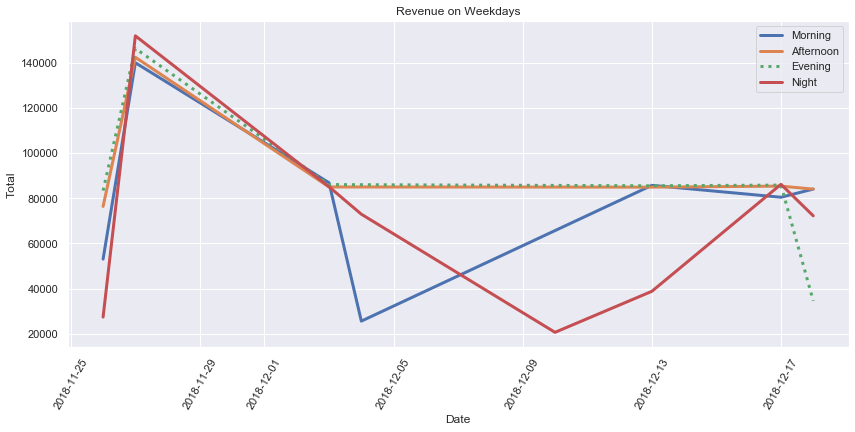

In [77]:
#revenue on different part of the days when work day

_ = plt.figure(figsize = (14, 6))
plot1, = plt.plot(lyft_work[lyft_work['day'] == 'morning'][['date', 'price']].groupby('date').sum(), linewidth = 3)
plot2, = plt.plot(lyft_work[lyft_work['day'] == 'afternoon'][['date', 'price']].groupby('date').sum(), linewidth = 3, linestyle = '-')
plot3, = plt.plot(lyft_work[lyft_work['day'] == 'evening'][['date', 'price']].groupby('date').sum(), linewidth = 3, linestyle = ':')
plot4, = plt.plot(lyft_work[lyft_work['day'] == 'night'][['date', 'price']].groupby('date').sum(),linewidth = 3)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue on Weekdays')
_ = plt.legend([plot1, plot2, plot3, plot4], ["Morning", "Afternoon", "Evening", "Night"])
_ = plt.xticks(rotation = 60)

plt.show()

In [78]:
#revenue on different part of the days

lyft[['day', 'price']].groupby('day').sum()

,price
day,
afternoon,1389262.05
evening,1331658.78
morning,1222350.30
night,1354881.85


# COMBINE

In [79]:
uber.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769,night,No
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572,night,No
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118,night,No
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968,night,No
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623,night,No


In [80]:
lyft.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
0,2018-11-26,03:40:46.318000,2018-11-26 03:40:46.318000078,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122,night,No
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988,night,No
2,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153,night,No
3,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224,night,No
4,2018-11-26,03:40:46.358999,2018-11-26 03:40:46.358999968,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453,night,No


In [81]:
#concatinating uber and lyft dataframes into one again

frames = [uber, lyft]

df = pd.concat(frames)

In [82]:
df.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769,night,No
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572,night,No
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118,night,No
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968,night,No
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623,night,No


In [83]:
df.tail()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
306168,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,7.0,1.0,Shared,2.916667,evening,No
306169,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.375000,evening,No
306170,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,16.5,1.0,Lux,6.875000,evening,No
306171,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,16.5,1.0,Lyft XL,6.875000,evening,No
306172,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,32.5,1.0,Lux Black XL,13.541667,evening,No


In [84]:
df.shape

(634518, 13)

In [85]:
df = df.reset_index(drop = True)

In [86]:
df.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769,night,No
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572,night,No
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118,night,No
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968,night,No
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623,night,No


In [87]:
df.tail()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,mile,day,holiday
634513,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,7.0,1.0,Shared,2.916667,evening,No
634514,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.375000,evening,No
634515,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,16.5,1.0,Lux,6.875000,evening,No
634516,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,16.5,1.0,Lyft XL,6.875000,evening,No
634517,2018-12-18,19:15:10.943000,2018-12-18 19:15:10.943000078,2.4,Lyft,Beacon Hill,Northeastern University,32.5,1.0,Lux Black XL,13.541667,evening,No


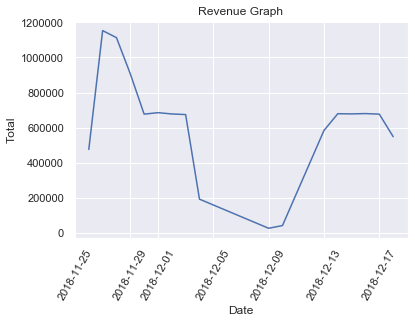

In [88]:
#Revenue Graph

_ = plt.plot(df[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')
_ = plt.xticks(rotation = 60)

plt.show()

In [89]:
#splitting dataframe into holiday and work 

df_holiday = df[df['holiday'] == 'Yes']
df_work = df[df['holiday'] == 'No']

In [90]:
df_holiday.shape

(371173, 13)

In [91]:
df_work.shape

(263345, 13)

In [92]:
df.shape

(634518, 13)

In [93]:
df['holiday'].value_counts()

Yes    371173
No     263345
Name: holiday, dtype: int64

(array([2.69509e+05, 1.84799e+05, 1.27386e+05, 4.36520e+04, 7.18700e+03,
        1.39300e+03, 4.07000e+02, 9.00000e+01, 7.30000e+01, 2.20000e+01]),
 array([ 2.5, 12. , 21.5, 31. , 40.5, 50. , 59.5, 69. , 78.5, 88. , 97.5]),
 <a list of 10 Patch objects>)

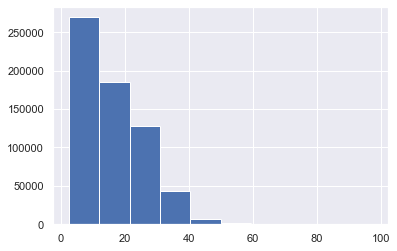

In [94]:
#price distribution 
plt.hist(df['price'])

## STATISTICAL TESTING

In [95]:
pd.crosstab(df.day, df.holiday, values = df.price, aggfunc = 'sum')

holiday,No,Yes
day,,
afternoon,1109267.85,1638982.70
evening,1028615.78,1581363.00
morning,1113173.45,1312663.85
night,1093052.50,1589024.35


In [96]:
chi2_contingency(pd.crosstab(df.day, df.holiday))

(1561.649776249914, 0.0, 3, array([[69228.51051507, 97574.48948493],
        [65517.71327212, 92344.28672788],
        [61105.09764892, 86124.90235108],
        [67493.67856389, 95129.32143611]]))

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [97]:
from scipy.stats import shapiro
data = df['price']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.912, p=0.000
Probably not Gaussian


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [98]:
mean_val = np.mean(df['price'])
std = np.std(df['price'])

degree_f = len(df['price']) - 1
critical = t.ppf(0.05, degree_f)
SE = std/np.sqrt(len(df['price']))
up_lim = mean_val + (critical * SE)
low_lim = mean_val - (critical * SE)
print(up_lim)
print(low_lim)

16.475414314904025
16.51385779400383


H0: Customers pay the same on holidays and work days

Ha: Customers pay different on holidays and work days

In [152]:
sample0 = df_holiday['price']
sample1 = df_work['price']

mean0 = np.mean(sample0)
mean1 = np.mean(sample1)

n0 = len(sample0)
n1 = len(sample1)

s0 = np.std(sample0, ddof = 1)
s1 = np.std(sample1, ddof = 1)

sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2)/(n0+n1-2))
t = (mean0 - mean1)/(sp * np.sqrt(1/n0 +1/n1))


print(t)

-0.09022659225415312


In [153]:
ttest_ind(sample0, sample1)

Ttest_indResult(statistic=-0.09022659225412288, pvalue=0.9281071814219399)

In [101]:
np.random.seed(47)
N_rep = 10000

def bootstrap_replicate_1d(data, function):
    sample = np.random.choice(data, len(data))
    return function(sample)

def draw_bs_reps(data, function, size = 100):
    replicates = np.empty(size)
    
    for i in range(size):
        replicates[i] = bootstrap_replicate_1d(data, function)
    return replicates



reps = draw_bs_reps(df['price'], np.mean, N_rep)
mean = np.mean(reps)
std = np.std(reps)

confi = np.percentile(reps , [5, 95])
print(confi)

[16.47522449 16.51373274]


## WEATHER

In [102]:
df2 = pd.read_csv('weather.csv')

In [103]:
df2.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [104]:
df2['date_time'] = pd.to_datetime(df2['time_stamp'], unit = 's')

In [105]:
df2.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01


In [106]:
df2['date'] = [d.date() for d in df2['date_time']]
df2['time'] = [d.time() for d in df2['date_time']]

In [107]:
df['merge_date'] = df.source.astype(str) +" - "+ df.date_time.dt.date.astype("str") +" - "+ df.date_time.dt.hour.astype("str")
df2['merge_date'] = df2.location.astype(str) +" - "+ df2.date_time.dt.date.astype("str") +" - "+ df2.date_time.dt.hour.astype("str")

In [108]:
df2.index = df2['merge_date']

In [109]:
uber_lyft = df.join(df2,on=['merge_date'],rsuffix ='_w')

In [110]:
uber_lyft.head()

,date,time,date_time,distance,cab_type,destination,source,price,surge_multiplier,name,...,clouds,pressure,rain,time_stamp,humidity,wind,date_time_w,date_w,time_w,merge_date_w
0,2018-11-26,03:40:46.319000,2018-11-26 03:40:46.319000006,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,...,0.87,1014.39,NaN,1.543204e+09,0.93,1.60,2018-11-26 03:40:44,2018-11-26,03:40:44,South Station - 2018-11-26 - 3
1,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,...,0.87,1014.39,NaN,1.543204e+09,0.93,1.55,2018-11-26 03:40:45,2018-11-26,03:40:45,Theatre District - 2018-11-26 - 3
2,2018-11-26,03:40:46.319999,2018-11-26 03:40:46.319999933,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,...,0.87,1014.39,NaN,1.543204e+09,0.93,1.55,2018-11-26 03:40:45,2018-11-26,03:40:45,Theatre District - 2018-11-26 - 3
3,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,...,0.87,1014.39,NaN,1.543204e+09,0.92,1.50,2018-11-26 03:40:45,2018-11-26,03:40:45,Beacon Hill - 2018-11-26 - 3
4,2018-11-26,03:40:46.358000,2018-11-26 03:40:46.358000040,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,...,0.89,1014.35,NaN,1.543204e+09,0.92,1.43,2018-11-26 03:40:45,2018-11-26,03:40:45,North Station - 2018-11-26 - 3


In [111]:
uber_lyft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161365 entries, 0 to 634517
Data columns (total 26 columns):
date                1161365 non-null object
time                1161365 non-null object
date_time           1161365 non-null datetime64[ns]
distance            1161365 non-null float64
cab_type            1161365 non-null object
destination         1161365 non-null object
source              1161365 non-null object
price               1161365 non-null float64
surge_multiplier    1161365 non-null float64
name                1161365 non-null object
mile                1161365 non-null float64
day                 1161365 non-null object
holiday             1161365 non-null object
merge_date          1161365 non-null object
temp                1158646 non-null float64
location            1158646 non-null object
clouds              1158646 non-null float64
pressure            1158646 non-null float64
rain                189168 non-null float64
time_stamp          1158646 non-null 

In [112]:
uber_lyft.columns

Index(['date', 'time', 'date_time', 'distance', 'cab_type', 'destination',
       'source', 'price', 'surge_multiplier', 'name', 'mile', 'day', 'holiday',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp', 'humidity', 'wind', 'date_time_w', 'date_w', 'time_w',
       'merge_date_w'],
      dtype='object')

In [113]:
uber_lyft['rain'].fillna(0,inplace=True)
uber_lyft = uber_lyft[pd.notnull(uber_lyft['date_time_w'])] 
uber_lyft = uber_lyft[pd.notnull(uber_lyft['price'])]

In [114]:
uber_lyft = uber_lyft.drop(columns = ['date_time', 'destination', 'merge_date', 'location', 'time_stamp', 'date_time_w', 'date_w', 'time_w', 'merge_date_w'])

In [115]:
uber_lyft.head()

,date,time,distance,cab_type,source,price,surge_multiplier,name,mile,day,holiday,temp,clouds,pressure,rain,humidity,wind
0,2018-11-26,03:40:46.319000,1.30,Uber,South Station,18.5,1.0,Black,14.230769,night,No,40.86,0.87,1014.39,0.0,0.93,1.60
1,2018-11-26,03:40:46.319999,2.71,Uber,Theatre District,19.5,1.0,UberX,7.195572,night,No,40.80,0.87,1014.39,0.0,0.93,1.55
2,2018-11-26,03:40:46.319999,2.71,Uber,Theatre District,32.0,1.0,UberXL,11.808118,night,No,40.80,0.87,1014.39,0.0,0.93,1.55
3,2018-11-26,03:40:46.358000,2.19,Uber,Beacon Hill,8.0,1.0,UberX,3.652968,night,No,41.02,0.87,1014.39,0.0,0.92,1.50
4,2018-11-26,03:40:46.358000,3.05,Uber,North Station,10.5,1.0,WAV,3.442623,night,No,40.94,0.89,1014.35,0.0,0.92,1.43


In [116]:
uber_lyft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158646 entries, 0 to 634219
Data columns (total 17 columns):
date                1158646 non-null object
time                1158646 non-null object
distance            1158646 non-null float64
cab_type            1158646 non-null object
source              1158646 non-null object
price               1158646 non-null float64
surge_multiplier    1158646 non-null float64
name                1158646 non-null object
mile                1158646 non-null float64
day                 1158646 non-null object
holiday             1158646 non-null object
temp                1158646 non-null float64
clouds              1158646 non-null float64
pressure            1158646 non-null float64
rain                1158646 non-null float64
humidity            1158646 non-null float64
wind                1158646 non-null float64
dtypes: float64(10), object(7)
memory usage: 159.1+ MB


In [117]:
uber_lyft.shape

(1158646, 17)

In [118]:
uber_lyft.describe()

,distance,price,surge_multiplier,mile,temp,clouds,pressure,rain,humidity,wind
count,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06,1.158646e+06
mean,2.199119e+00,1.649404e+01,1.014961e+00,9.221300e+00,3.925413e+01,6.801926e-01,1.004981e+03,1.115135e-02,7.537614e-01,7.695003e+00
std,1.131860e+00,9.312014e+00,9.469262e-02,6.846173e+00,5.469841e+00,2.996866e-01,1.269528e+01,5.107346e-02,1.195311e-01,3.447598e+00
min,1.700000e-01,2.500000e+00,1.000000e+00,5.565863e-01,1.962000e+01,0.000000e+00,9.882500e+02,0.000000e+00,4.500000e-01,2.900000e-01
25%,1.300000e+00,9.000000e+00,1.000000e+00,4.642857e+00,3.726000e+01,4.500000e-01,9.940700e+02,0.000000e+00,6.600000e-01,4.970000e+00
50%,2.170000e+00,1.350000e+01,1.000000e+00,7.449495e+00,3.961000e+01,7.600000e-01,1.000770e+03,0.000000e+00,7.200000e-01,8.800000e+00
75%,2.940000e+00,2.250000e+01,1.000000e+00,1.146617e+01,4.269000e+01,9.700000e-01,1.014520e+03,0.000000e+00,8.700000e-01,1.023000e+01
max,7.860000e+00,9.750000e+01,3.000000e+00,5.000000e+01,5.541000e+01,1.000000e+00,1.035120e+03,7.807000e-01,9.900000e-01,1.818000e+01


In [119]:
print(uber_lyft.columns)

Index(['date', 'time', 'distance', 'cab_type', 'source', 'price',
       'surge_multiplier', 'name', 'mile', 'day', 'holiday', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


In [120]:
uber.name.value_counts()

UberX        55021
WAV          55019
UberXL       55019
UberPool     55018
Black        54986
Black SUV    53282
Name: name, dtype: int64

In [121]:
lyft.name.value_counts()

Shared          51233
Lux             51232
Lyft XL         51231
Lyft            51229
Lux Black       51202
Lux Black XL    50046
Name: name, dtype: int64

#### UBER PREDICTION

In [123]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [133]:
def cv_score(rf, X, y, score_func = evaluate):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(X):
        rf.fit(X[train], y[train])
        result += score_func(rf, X[test], y[test])
    return result/nfold

In [134]:
uber_list = ['Black', 'WAV', 'Black SUV', 'UberX', 'UberXL', 'UberPool']

In [135]:
for i in uber_list:
    features = uber_lyft[uber_lyft.name== i][['distance', 'source', 'surge_multiplier', 'temp','clouds', 'pressure','humidity', 'wind', 'rain', 'holiday']]
    labels = np.array(uber_lyft[uber_lyft.name== i]['price'])
    features = pd.get_dummies(features)
    feature_list = list(features.columns)
    features = np.array(features)
    
    #splitting dataset into train and test
    train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size = 0.25, 
                                                                            random_state = 42)
    #training the model
    rf = RandomForestRegressor(random_state = 42)
    accuracy = cv_score(rf, train_features, train_labels)
    
    print(' ')
    print('Model Performance for: ' + i)
    #Accuracy 
    print('Accuracy is ' + str(accuracy) + '.')
    
    print(' ')
    print(' ')
    print('------------------------------------')
    print(' ')

/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Black
Accuracy is 94.27060106470128.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: WAV
Accuracy is 90.24341117511975.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Black SUV
Accuracy is 95.57176095786815.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: UberX
Accuracy is 90.0604695181114.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: UberXL
Accuracy is 90.19478159274986.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: UberPool
Accuracy is 88.71050744210274.
 
 
------------------------------------
 


#### LYFT PREDICTION

In [136]:
lyft_list = ['Shared', 'Lux', 'Lyft XL', 'Lyft', 'Lux Black', 'Lux Black XL']

In [137]:
for i in lyft_list:
    features = uber_lyft[uber_lyft.name== i][['distance', 'source', 'surge_multiplier', 'temp', 'clouds', 'pressure','humidity', 'wind', 'rain', 'holiday']]
    labels = np.array(uber_lyft[uber_lyft.name== i]['price'])
    features = pd.get_dummies(features)
    feature_list = list(features.columns)
    features = np.array(features)
    
    #splitting dataset into train and test
    train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size = 0.25, 
                                                                            random_state = 42)
    #training the model
    rf = RandomForestRegressor(random_state = 42)
    accuracy = cv_score(rf, train_features, train_labels)
    
    print(' ')
    print('Model Performance for: ' + i)
    #Accuracy 
    print('Accuracy is ' + str(accuracy) + '.')
    
    print(' ')
    print(' ')
    print('------------------------------------')
    print(' ')

/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Shared
Accuracy is 80.0771276856123.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Lux
Accuracy is 96.1403085272367.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Lyft XL
Accuracy is 95.20678690244137.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Lyft
Accuracy is 95.27243097842356.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Lux Black
Accuracy is 96.65173934467983.
 
 
------------------------------------
 


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Model Performance for: Lux Black XL
Accuracy is 96.55853877435024.
 
 
------------------------------------
 


#### OPTIMIZATION

In [139]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [144]:

features = uber_lyft[uber_lyft.name== 'UberX'][['distance', 'source', 'surge_multiplier', 'temp','clouds', 'pressure','humidity', 'wind', 'rain', 'holiday']]
labels = np.array(uber_lyft[uber_lyft.name== 'UberX']['price'])
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)
    
    
#splitting dataset into train and test
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size = 0.25, 
                                                                            random_state = 42)
    
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(train_features, train_labels)
    
rf_random.best_params_
    
best_random = rf_random.best_estimator_

In [146]:
#Accuracy
accuracy = evaluate(best_random, test_features, test_labels)
print('Accuracy for UberX: ' + str(accuracy))

Accuracy for UberX: 90.94165661522871


In [150]:

features = uber_lyft[uber_lyft.name== 'Lyft'][['distance', 'source', 'surge_multiplier', 'temp','clouds', 'pressure','humidity', 'wind', 'rain', 'holiday']]
labels = np.array(uber_lyft[uber_lyft.name== 'Lyft']['price'])
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)
    
    
#splitting dataset into train and test
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size = 0.25, 
                                                                            random_state = 42)
    
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)
    
    
    
best_random = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 165.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 375.7min finished


In [151]:
#Accuracy
accuracy = evaluate(best_random, test_features, test_labels)
print('Accuracy for Lyft: ' + str(accuracy))

Accuracy for Lyft: 95.50108590481142
